<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/uda_l08_forecast_machinelearning_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

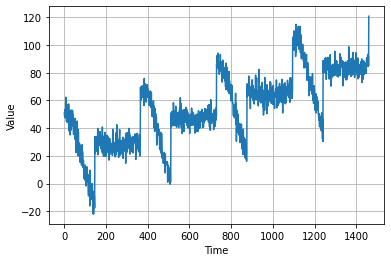

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


#Function to plot the time series graph.
def plot_series(time,series,start=0,end=None,format="_",label=None):
    plt.plot(time[start:end],series[start:end])
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

#Funtion to create trend in data for Y-axis
def trend(time,slope):
    return time*slope

#Create X-axis values
time=np.arange(4*365+1)
#Baseline value
baseline=10
#Create y-axis values
series=baseline+trend(time,0.1)

#Plot the graph
plot_series(time,series)
#plt.show()

#apply Cosine for the values less than 0.4 and apply exponetial to the values grater than or equal to 0.4
def seasonal_pattern(season_tme):
    return np.where(season_tme<0.4,np.cos(season_tme*2*np.pi),1/np.exp(3*season_tme))

#Generate series values by converting values of time data set to be between 0 and 1 and by applying seasonal_pattern function.
def seasonality(time,period=365,amplitude=1,phase=0):
    season_time=(((time+phase)%period)/period)
    return amplitude*seasonal_pattern(season_time)

series=seasonality(time,period=365,amplitude=40,phase=0)

plot_series(time,series)
#plt.show()

# let's create a series to include both tern and seasonality
series=baseline+trend(time,slope=0.05)+seasonality(time,period=365,amplitude=40,phase=0)
plot_series(time,series)
#plt.show()

#generate noise for each element in time dataset
def white_noise(time,noise_level=1,seed=None):
    rnd = np.random.RandomState(None)
    return rnd.randn(len(time))*noise_level


noise_level=5
noise = white_noise(time,noise_level=5)
plot_series(time,noise)
#plt.show()

plt.clf()
#Now add the noise to the time series
series=series+noise
plot_series(time,series)
#plt.show()

In [18]:
dataset=tf.data.Dataset.from_tensor_slices(series)
dataset=dataset.window(31,shift=1,drop_remainder=True)

In [ ]:
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

In [19]:
tupl=lambda window: window.batch(31)
dataset = dataset.flat_map(tupl)
splt=lambda window: (window[:-1],window[-1:])
dataset=dataset.map(splt)

In [21]:
dataset=dataset.shuffle(buffer_size=2)


In [22]:
dataset=dataset.batch(10).prefetch(1)

In [23]:
#create a function with all the above code to prepare data for machine learning algorithm.
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
dataset=window_dataset(series,30,10,10)
for x, y in dataset:
    print("x =", x.numpy())
    print("y =", y.numpy())